# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

4. RESPONSE: Since g is non-decreasing, the element that was the median before the transformation should still split the data in equal parts. This applies to any quantile because the transformed quantile remains the quartile of the transformed variables. This does in apply in IQR; it doesn't transform under non-decreasing transformations. The range does not transform under non-decreasing transformations as well.
5. RESPONSE: It is not always true that the mean of a non-decreasing transformation of X is equal to the transformation of the mean. This is only true when the function is strictly increasing and problem arise if there are flat regions.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

#### 2.1

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./data/ForeignGifts_edu.csv")
df.head

<bound method NDFrame.head of           ID    OPEID                     Institution Name          City  \
0          1   102000        Jacksonville State University  Jacksonville   
1          2   104700                      Troy University          Troy   
2          3   105100                University of Alabama    Tuscaloosa   
3          4   105100                University of Alabama    Tuscaloosa   
4          5   105100                University of Alabama    Tuscaloosa   
...      ...      ...                                  ...           ...   
28216  28217  4279700  Albert Einstein College of Medicine         Bronx   
28217  28218  4279700  Albert Einstein College of Medicine         Bronx   
28218  28219  4279700  Albert Einstein College of Medicine         Bronx   
28219  28220  4279700  Albert Einstein College of Medicine         Bronx   
28220  28221  4279700  Albert Einstein College of Medicine         Bronx   

      State  Foreign Gift Received Date  Foreign Gift Amo

#### 2.2

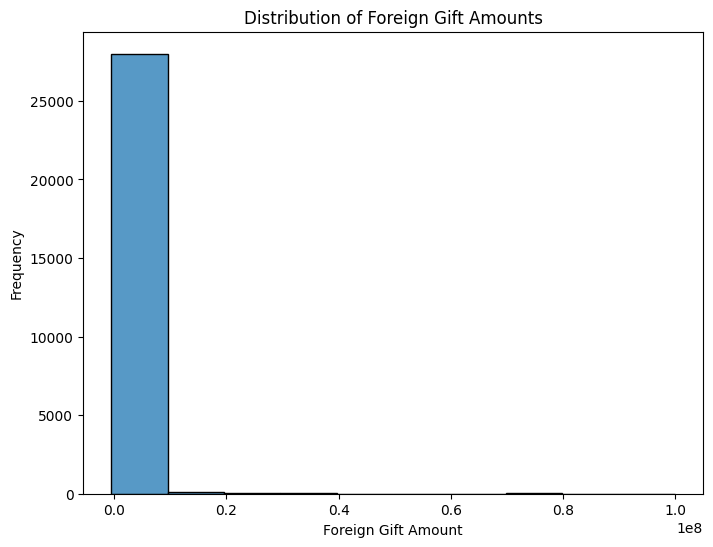

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df["Foreign Gift Amount"], bins=10)
plt.title("Distribution of Foreign Gift Amounts")
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.show()
df["Foreign Gift Amount"].describe()


This histogram shows a strong skew because of an outliers that are high values. However, most are are between zero and 0.1. This is very badly scaled; we would want to smooth it with a log() function.

#### 2.3

/tmp/ipykernel_116110/3241042855.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df["Gift Type"])


Proportion of contract: 0.6120973742957372
 Proportion of monetary: 0.3875128450444704
 Proportion of real estate: 0.00038978065979235324


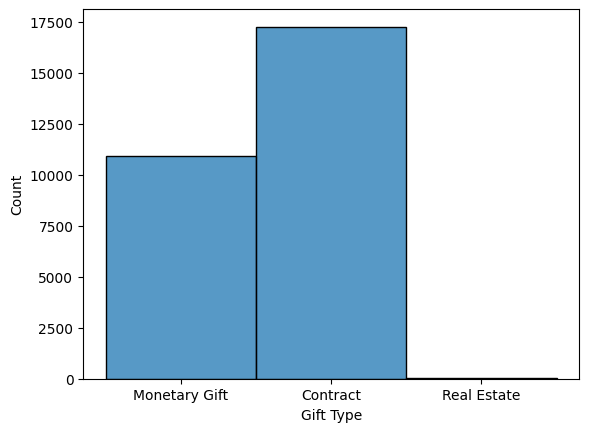

In [35]:
# Question three
sns.histplot(df["Gift Type"])

pd.value_counts(df["Gift Type"])

contractProp = 17274/28221
monetaryProp = 10936/28221
realEstateProp = 11/28221

print(f"Proportion of contract: {contractProp}\n Proportion of monetary: {monetaryProp}\n Proportion of real estate: {realEstateProp}")

Proportion of contracts is ~0.61. Proportion of monetary is ~0.39. Proportion of real estate ~0.0004

#### 2.4

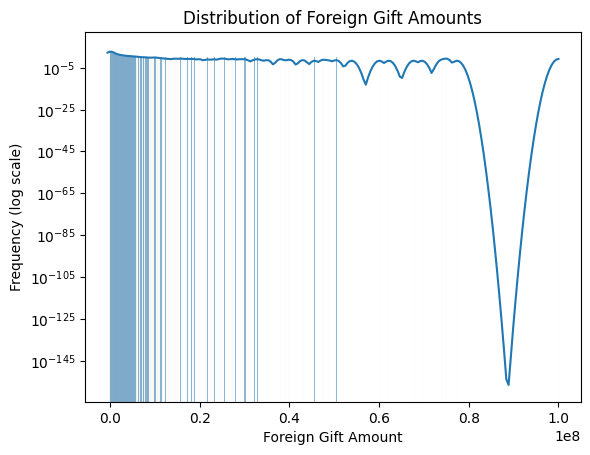

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd996178880>>
Traceback (most recent call last):
  File "/home/karenguzman/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
/home/karenguzman/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


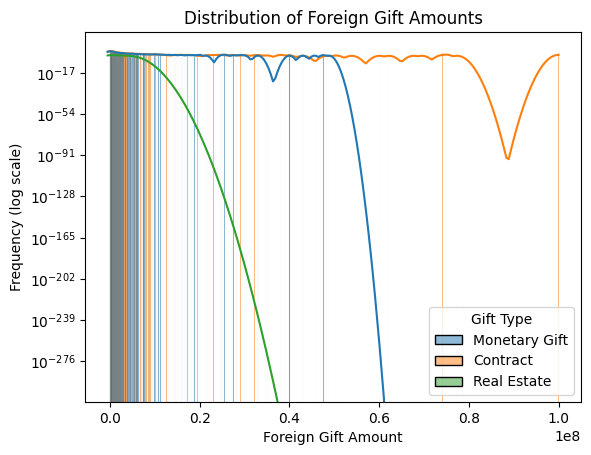

In [36]:
sns.histplot(df["Foreign Gift Amount"], kde =True)
plt.yscale("log")
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

sns.histplot(df, x="Foreign Gift Amount", kde =True, hue="Gift Type")
plt.yscale("log")
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

# df["Foreign Gift Amount"] = np.log(df["Foreign Gift Amount"])
# df.loc[df["Foreign Gift Amount"]>0, "Foreign Gift Amount"].hist(bins=20, grid=False)

The proportion of contact gifts was the highest and its distribution spans wider than the other two types of gifts. The real estate gifts were the smallest proportion and the distribution only reaches to about 0.4.

#### 2.5

In [ ]:
top_countries_gift_num = df.groupby("Country of Giftor").size().nlargest(15)
print(f"Top 15 countries based on number of gifts: \n{top_countries_gift_num}")
top_countries_amount_given = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)
print(f"\nTop 15 countries based on amount given: \n{top_countries_amount_given}")

Top 15 countries based on number of gifts: 
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

Top 15 countries based on amount given: 
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA      

#### 2.6

Top 15 institution based on total amount of money they receive: 
Institution Name
University of California, Los Angeles          3916
California Institute of Technology             2502
Columbia University in the City of New York    1127
Ohio State University (The)                    1014
Johns Hopkins University                        899
University of Michigan - Ann Arbor              715
Stanford University                             668
Cornell University                              653
University of Pennsylvania                      625
Massachusetts Institute of Technology           582
Yale University                                 550
Harvard University                              453
University of Colorado Denver                   436
University of Chicago (The)                     401
Arizona State University                        400
Name: Foreign Gift Amount, dtype: int64


<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

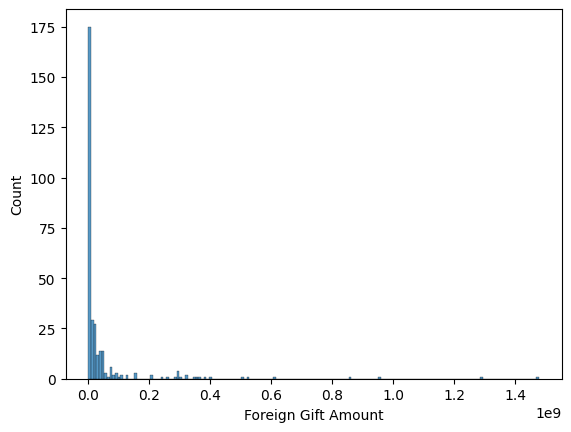

In [ ]:
top_institutions = df.groupby("Institution Name")["Foreign Gift Amount"].size().nlargest(15)
print(f"Top 15 institution based on total amount of money they receive: \n{top_institutions}")
all_institutions = df.groupby("Institution Name")["Foreign Gift Amount"].sum()
sns.histplot(all_institutions)

#### 2.7

In [37]:
top_giftors = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


The Quatar Foundation provides the most money in total.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

#### 4.1

In [39]:
drills = pd.read_csv("./data/drilling_rigs.csv")
drills.head

print(drills.dtypes)

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                                    

There are 624 observations and 10 variables in this dataset. The numeric variables are type Objects right now. This would mean that we would have to clean these rows and coerce them to numeric values. These rows would include 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)', 'Active Well Service Rig Count (Number of Rigs)'.

#### 4.2

In [41]:
drills["time"]=pd.to_datetime(drills["Month"], format="mixed")

#### 4.3

In [43]:
cols_to_convert = [
    "Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",
    "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",
    "Active Well Service Rig Count (Number of Rigs)"
]
drills[cols_to_convert]=drills[cols_to_convert].apply(pd.to_numeric, errors='coerce')

print(drills.dtypes)

Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                            float64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                          float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)            float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)           float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)              float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                              int64
Active Wel

[Text(0.5, 1.0, 'Active Well Service Rig Count Over Time'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Rigs')]

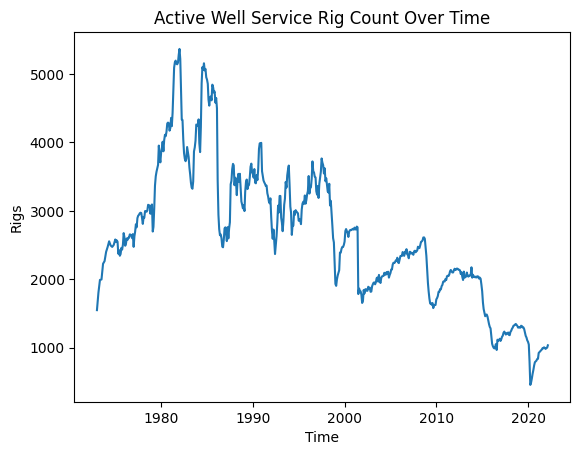

In [48]:
figure1 = sns.lineplot(data = drills, x ="time", y="Active Well Service Rig Count (Number of Rigs)")
figure1.set(title="Active Well Service Rig Count Over Time", xlabel="Time",ylabel="Rigs")

From this lineplot, we see that the number of active rigs had increased greatly in the early 1980's and then has had an overall decrease since then.

#### 4.4

Text(0, 0.5, 'Change in Active Well Service Rig Count')

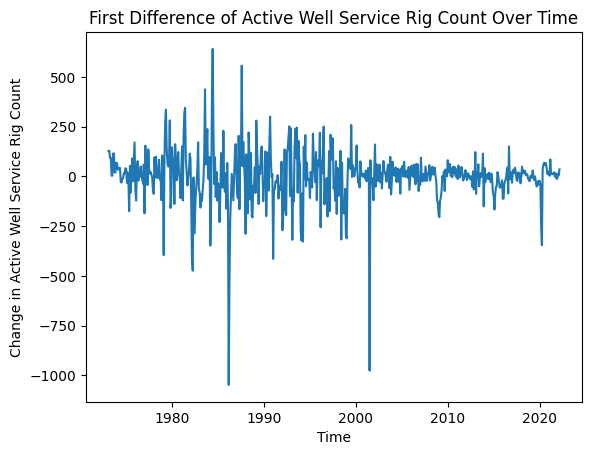

In [53]:
drills["Rig Count Change"] = drills["Active Well Service Rig Count (Number of Rigs)"].diff()
plt.plot(drills["time"], drills["Rig Count Change"])
plt.title("First Difference of Active Well Service Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Change in Active Well Service Rig Count")


#### 4.5

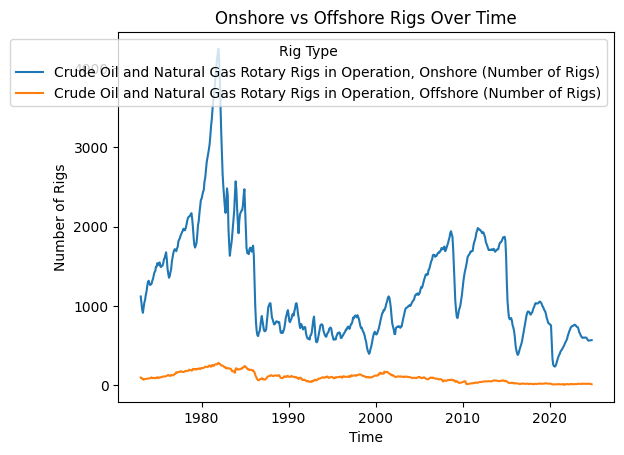

In [59]:
meltedDrills = drills.melt(id_vars=['time'],
                           value_vars=["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",  
                                "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"
                            ], 
                            var_name="Rig Type",
                            value_name="Number of Rigs"
)
figure2 = sns.lineplot(data=meltedDrills, x="time", y="Number of Rigs", hue="Rig Type")
figure2.set(title="Onshore vs Offshore Rigs Over Time", xlabel="Time", ylabel="Number of Rigs")
plt.legend(title="Rig Type")